# Strbp: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Strbp'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30508578,C57BL/6N,f,control,wt (Strbp),22.9,90.15,59.20,2.77,1.13
1,30508823,C57BL/6N,m,control,wt (Strbp),26.9,82.09,49.24,2.90,1.46
2,30508827,C57BL/6N,f,control,wt (Strbp),22.6,79.99,47.37,3.10,1.69


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30508578,Strbp_3v3_56.dcm,2.662500,0.015000,1.073256,0.044167,791.208791,0.015000,0.997852,high,0.997852,high,26.097677,2.491558,90.452951,59.689922,C57BL/6N,f,control,wt (Strbp),22.9,90.15,59.20,2.77,1.13,-0.107500,2.716250,-0.056744,1.101628,0.302951,0.489922
1,30508578,Strbp_3v3_56.dcm,2.724419,0.090833,1.011337,0.130833,765.957447,0.090833,0.997852,high,0.997852,high,27.623261,2.122567,92.316017,62.878788,C57BL/6N,f,control,wt (Strbp),22.9,90.15,59.20,2.77,1.13,-0.045581,2.747209,-0.118663,1.070669,2.166017,3.678788
2,30508578,Strbp_3v3_56.dcm,2.683140,0.169167,1.011337,0.211667,666.666667,0.169167,0.997852,high,0.997852,high,26.600867,2.122567,92.020686,62.307692,C57BL/6N,f,control,wt (Strbp),22.9,90.15,59.20,2.77,1.13,-0.086860,2.726570,-0.118663,1.070669,1.870686,3.107692
3,30508578,Strbp_3v3_56.dcm,2.786337,0.259167,0.970058,0.300833,727.272727,0.259167,0.998960,high,0.998960,high,29.197006,1.896068,93.505950,65.185185,C57BL/6N,f,control,wt (Strbp),22.9,90.15,59.20,2.77,1.13,0.016337,2.778169,-0.159942,1.050029,3.355950,5.985185
4,30508578,Strbp_3v3_56.dcm,2.703779,0.341667,1.031977,0.380000,637.168142,0.341667,0.998960,high,0.998960,high,27.109392,2.241627,91.731178,61.832061,C57BL/6N,f,control,wt (Strbp),22.9,90.15,59.20,2.77,1.13,-0.066221,2.736890,-0.098023,1.080988,1.581178,2.632061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,30508823,Strbp_3v3_44.dcm,2.951453,4.413333,1.114535,4.360000,818.181818,4.413333,1.000000,high,0.999064,high,33.630561,2.757472,91.800695,62.237762,C57BL/6N,m,control,wt (Strbp),26.9,82.09,49.24,2.90,1.46,0.051453,2.925727,-0.345465,1.287267,9.710695,12.997762
274,30508823,Strbp_3v3_44.dcm,3.199128,4.486667,1.465407,4.442500,808.988764,4.486667,1.000000,high,1.000000,high,40.932895,5.698723,86.077888,54.193548,C57BL/6N,m,control,wt (Strbp),26.9,82.09,49.24,2.90,1.46,0.299128,3.049564,0.005407,1.462703,3.987888,4.953548
275,30508823,Strbp_3v3_44.dcm,3.137209,4.560833,1.527326,4.525833,610.169492,4.560833,1.000000,high,1.000000,high,39.033508,6.350326,83.731091,51.315789,C57BL/6N,m,control,wt (Strbp),26.9,82.09,49.24,2.90,1.46,0.237209,3.018605,0.067326,1.493663,1.641091,2.075789
276,30508823,Strbp_3v3_44.dcm,2.972093,4.659167,1.506686,4.605833,782.608696,4.659167,0.999998,high,1.000000,high,34.209105,6.128551,82.085029,49.305556,C57BL/6N,m,control,wt (Strbp),26.9,82.09,49.24,2.90,1.46,0.072093,2.936047,0.046686,1.483343,-0.004971,0.065556


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

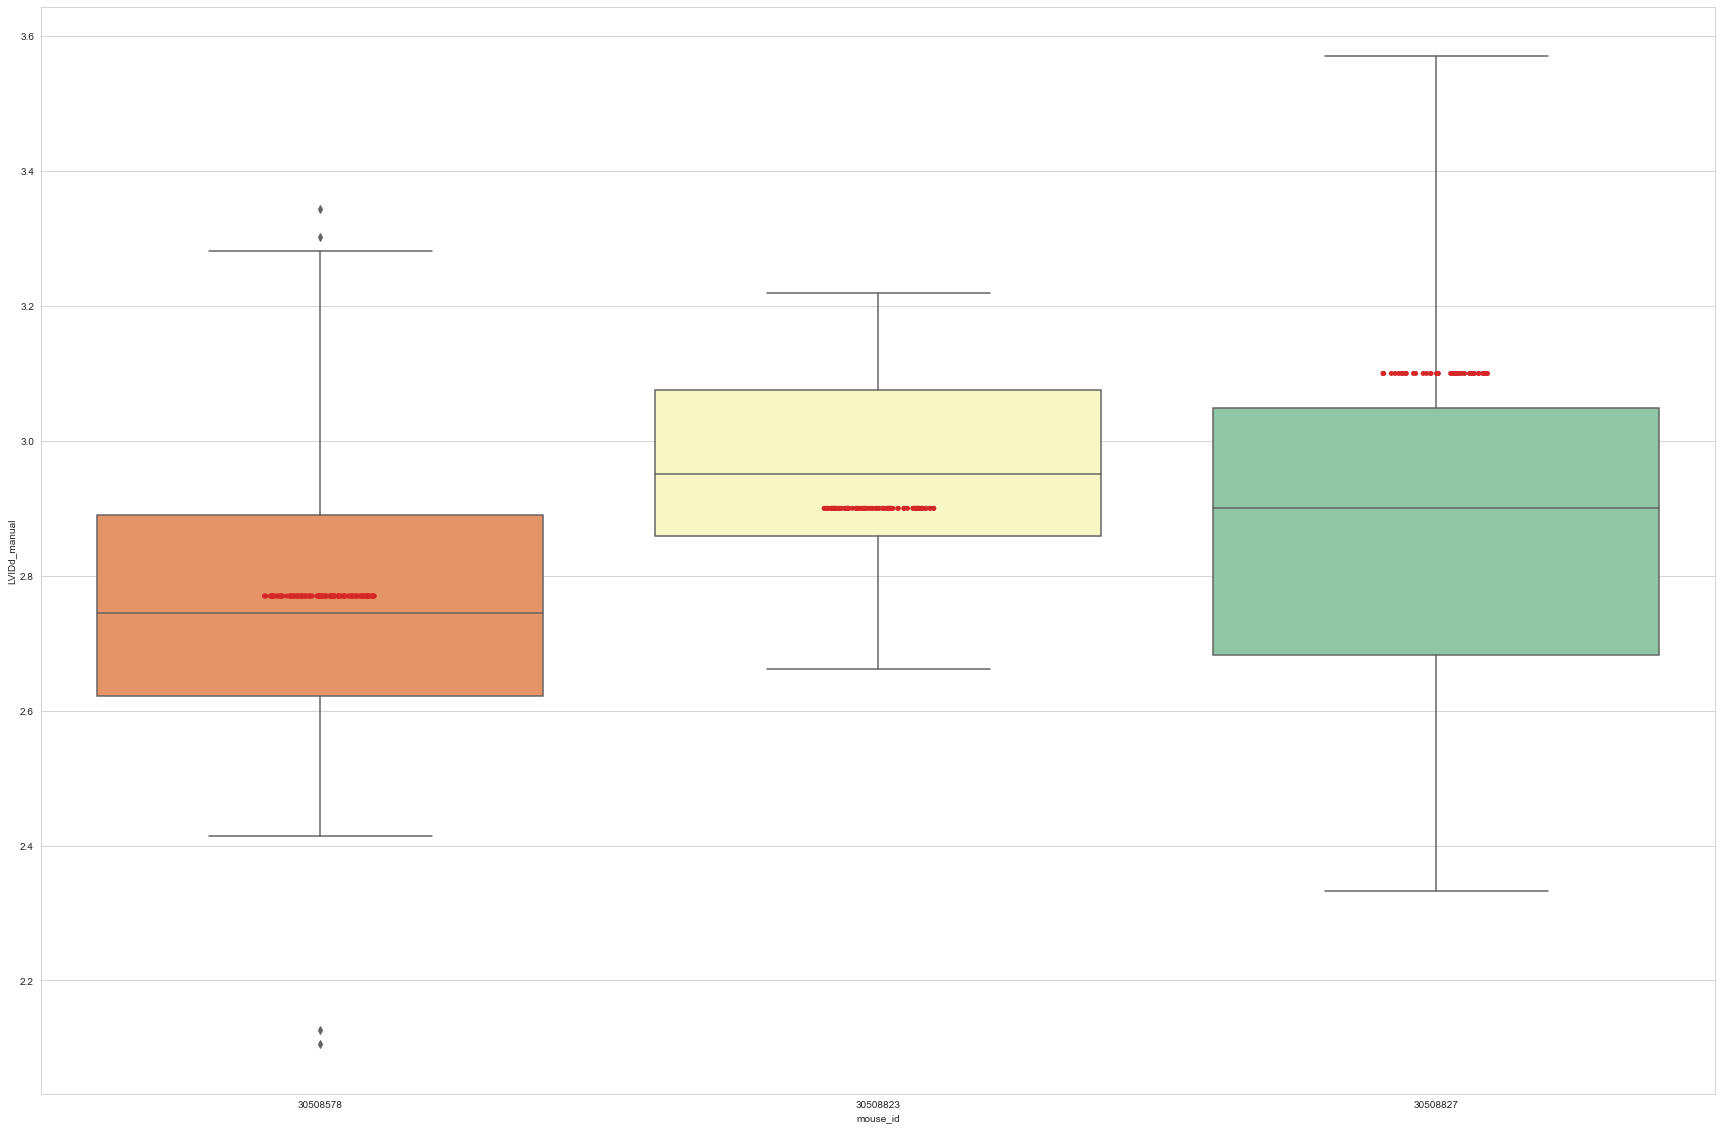

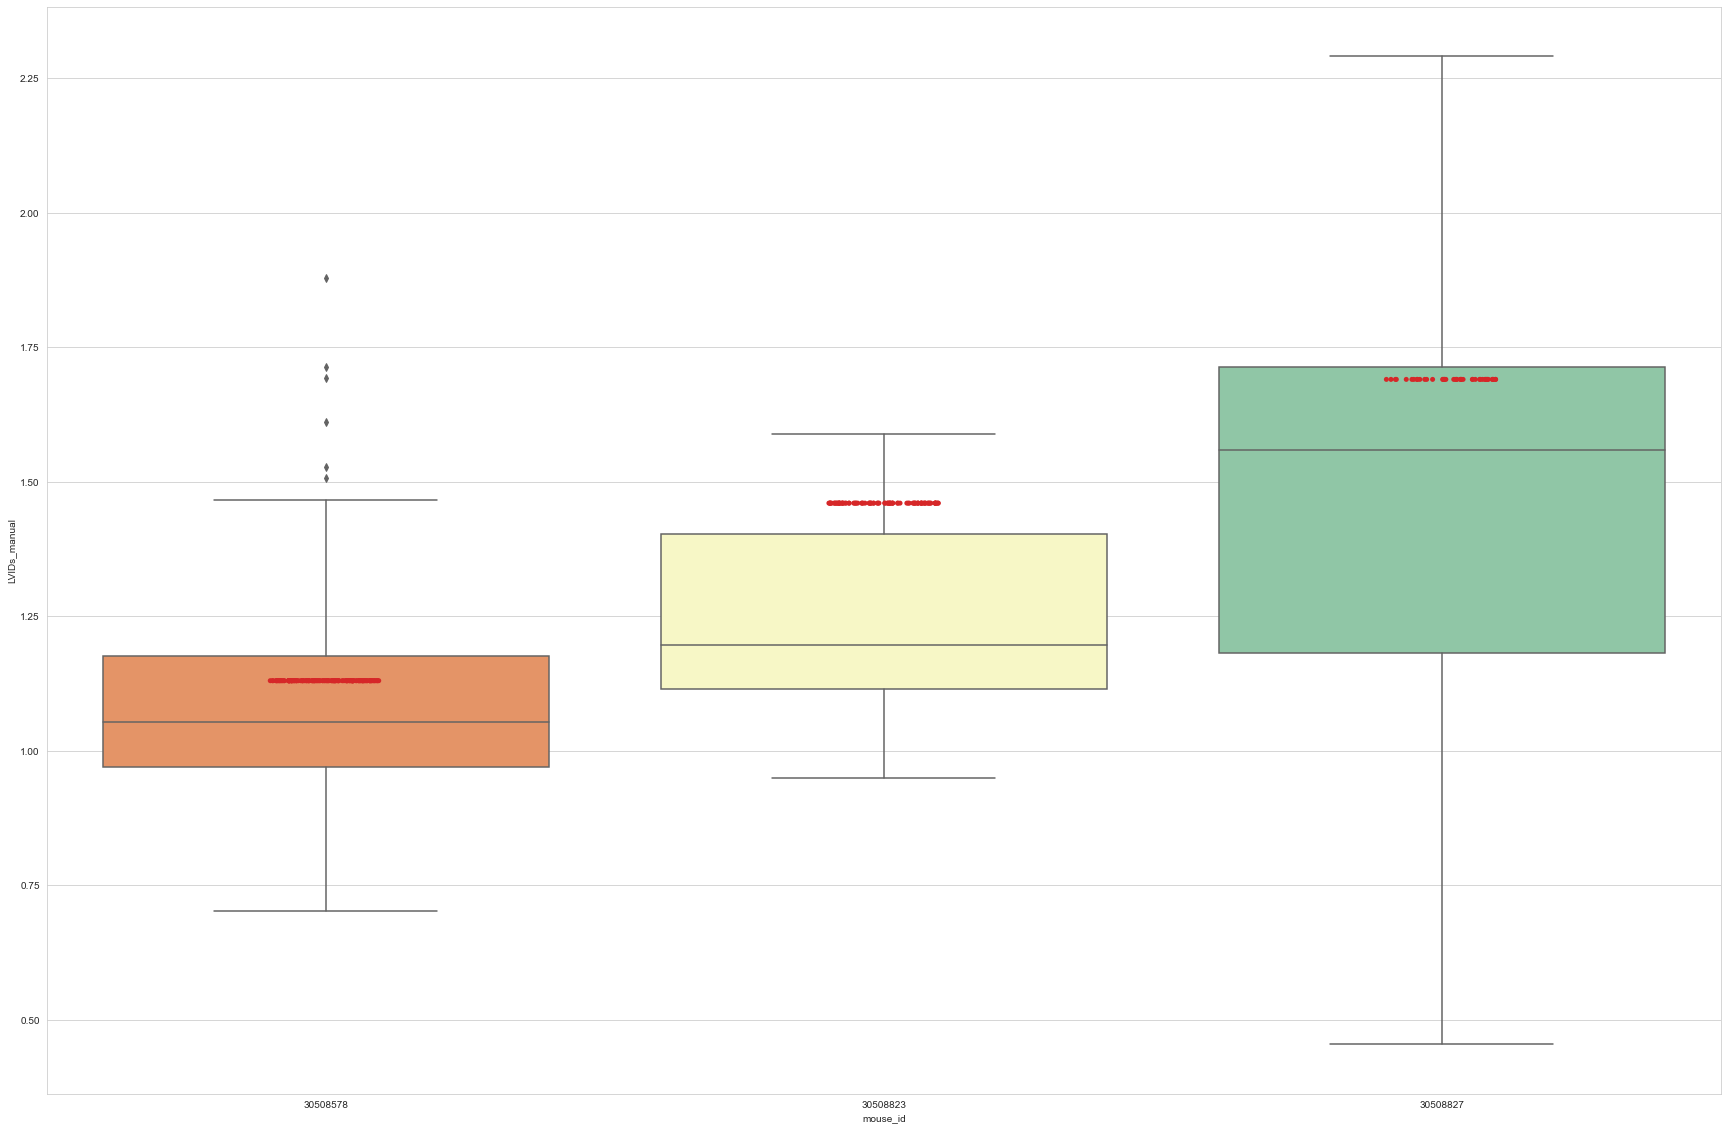

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

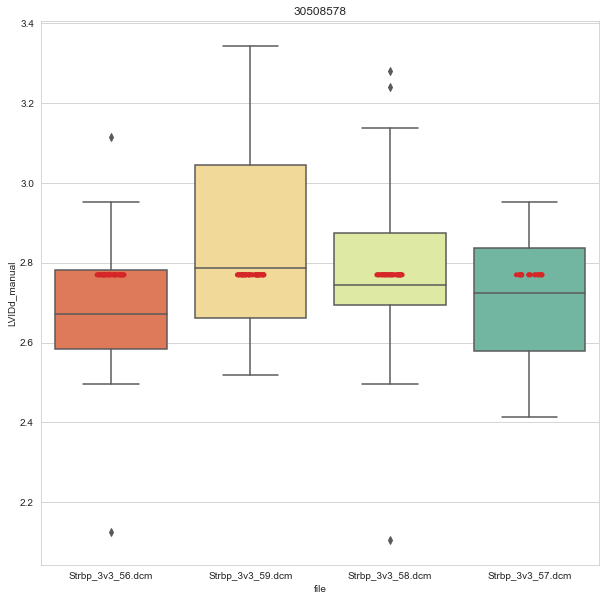

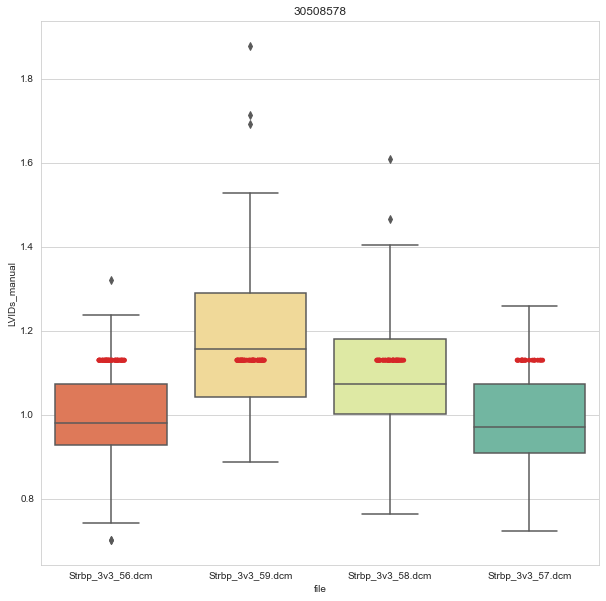

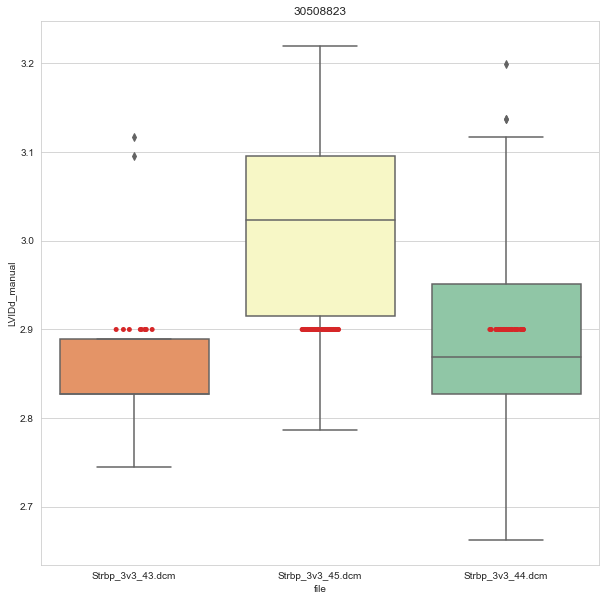

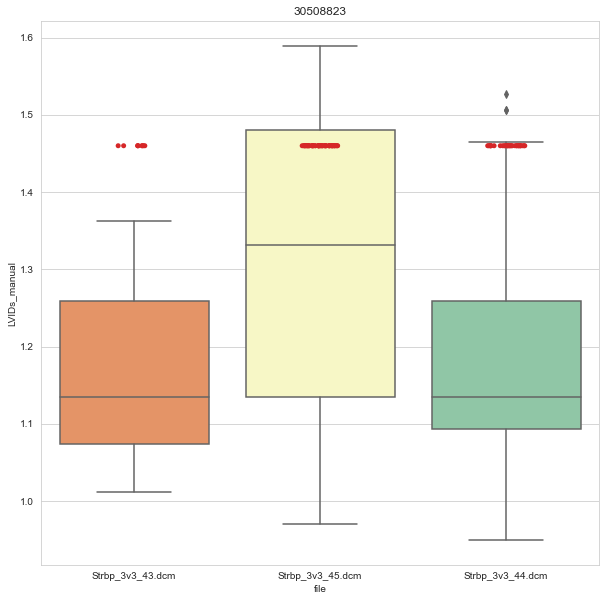

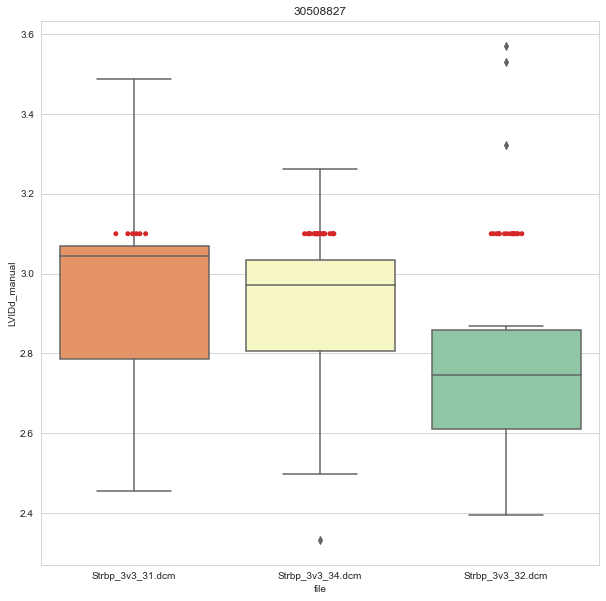

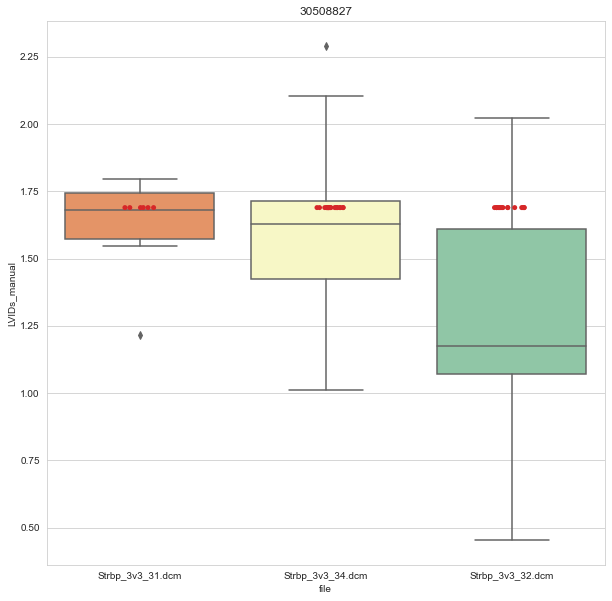

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
1911,30508578,Strbp_3v3_58,68.237108,31.762892
1912,30508578,Strbp_3v3_56,78.828366,21.171634
1913,30508578,Strbp_3v3_57,47.061847,52.938153
1914,30508578,Strbp_3v3_59,89.412369,10.587631
1915,30508823,Strbp_3v3_45,89.412369,10.587631
1916,30508823,Strbp_3v3_43,20.606372,79.393628
1917,30508823,Strbp_3v3_44,57.656732,42.343268
1918,30508827,Strbp_3v3_34,52.363823,47.636177
1919,30508827,Strbp_3v3_32,36.474216,63.525784
1920,30508827,Strbp_3v3_31,20.592770,79.407230


### Image quality per mouse

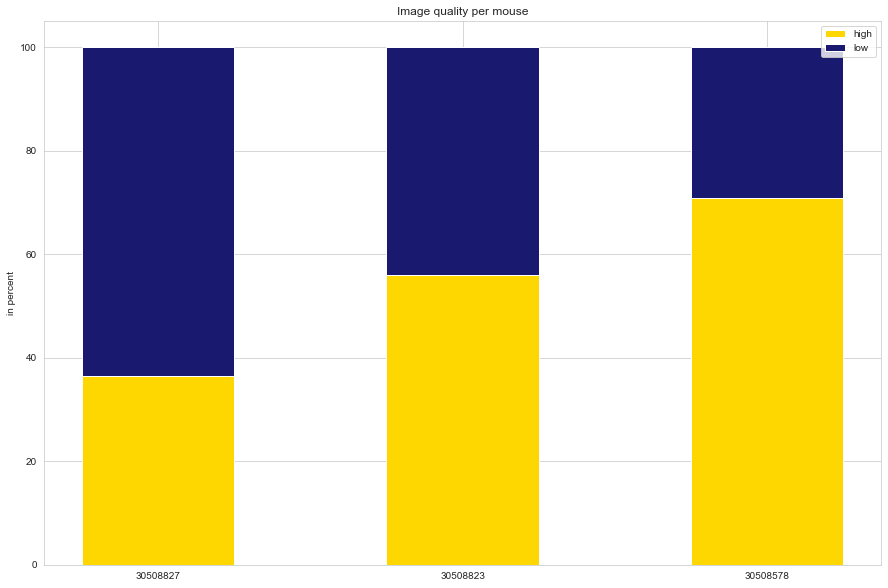

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Strbp,56.06,43.94


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,278.00,278.00,278.00,278.00
mean,-0.01,-0.12,2.35,3.82
std,0.22,0.24,6.43,7.62
min,-0.77,-1.24,-35.34,-26.40
25%,-0.13,-0.27,-0.55,-0.58
50%,-0.02,-0.12,2.52,3.72
75%,0.14,0.03,6.42,9.36
max,0.57,0.75,18.86,33.66
number of mice,3.00,3.00,3.00,3.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,2,2
m,1,1


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')